# Depth First Search - *Uninformed Search*
### Overview
This notebook implements and analyzes the Depth First Search (DFS) algorithm applied to maze solving. The goal is to find a path from the start to the finish in a maze represented as a 2D array. The algorithm code in this Notebook is written in python has been modified from LinkedIn learning Tutorial, Andrews (2023).
### Depth First Search
Depth First Search (DFS) explores the deepest node in the current frontier using a Last In First Out (LIFO) stack, where the most recently discovered node is expanded first. The implementation is modified for the graph search, which checks if a node has been previously expanded to prevent infinite loops. Search strategies in DFS and other methods primarily differ in how they determine the order of node expansion.
### Search Strategy
- Initializes the frontier using the initial state of the problem. Explore set = None.
- Take the last node in the queue of the stack and remove it from the frontier. 
- Check if the node is goal state. 
-   if it is, return solution path 
-   if not? continue
- Add the node to explored set
- Expand node and add resulting nodes to frontier
- Loop until frontier is empty or goal is found. 
### Steps:
1. **Convert the maze into a 2D Array**: Load maze data and convert it to integer format for processing.
2. **Implementing DFS**: Use a custom stack class to manage the nodes during the search process.
3. **Visualizing the Path**: Use matplotlib to illustrate the start, the path, and the goal within the maze.
# Implementing Depth First Search
The packages used in the DFS algorithm.

The packages used in the DFS algorithm 

In [1]:
import numpy as np
from Visualisations import *
from source_code.Helpers import string_to_int_array
from Depth_First_Search import dfs
from Helpers import find_goal, find_start
from Helpers import update_maze_with_path

# Load and Prepare Maze Data
1. Load the maze data and convert it to a usable format.
2. Find the starting state (2)
3. Find the end state (9) 

In [2]:
# take the string maze, load it to text with numpy
# Convert string type to int
dfs_maze_array_string = np.loadtxt('/Users/calebcougle/PycharmProjects/CAI104_COUGLE_A3/Mazes/a3maze.txt', dtype='str',
                                   delimiter=",")
dfs_a3_maze = string_to_int_array(dfs_maze_array_string)
# The output is a 2D numpy array 
print(dfs_a3_maze)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 9 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [3]:
dfs_a3_goal_point = find_goal(dfs_a3_maze)
dfs_a3_start_point = find_start(dfs_a3_maze)
print("Start point:", dfs_a3_start_point, "\nGoal:", dfs_a3_goal_point)

Start point: (2, 2) 
Goal: (4, 20)


# Stack Class Definition
- A stack class is used to act as the LIFO queue. 
- Define a class that stores the frontier
- The stack stores the frontier or 'discovered' nodes that are *yet to be explored*.
- Methods within the class `stack` perform operations on the queue according to the DFS *search strategy* which is `Last in First Out` or `Stack` queue, which takes the newest node from the queue: 
-       Pop() 
-       Is_Empty()
-       Push()
(Russell & Norvig, 2016)

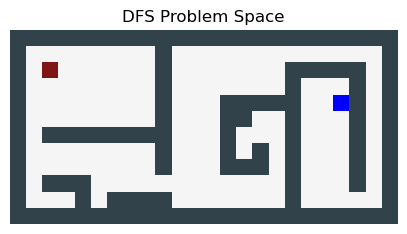

In [4]:
dfs_a3_maze_image = plot_maze(dfs_a3_maze, "DFS Problem Space")
dfs_a3_maze_image

# Depth First Search (DFS) Implementation

- **Function Definition**: The `dfs()` function implements the depth-first search algorithm, utilizing methods from the `Stack` class to manage nodes during the search.
- **Initial State**: The starting node (`start`) is pushed onto the stack, as identified in previous functions.
- **Predecessors Dictionary**: The `predecessors{}` dictionary functions similarly to an explored list; it records node traversal and returns the solution path when the goal is found.
- **Current Node**: The `current_cell`, analogous to the current node, is the most recently added node on the stack, retrieved using the `Stack.pop()` method.
- **Expanding Frontier**: The frontier expands as the nested `for` loop iterates over directions, pushing neighbors onto the stack. Neighbors are discovered by adding the directional offset to the current node's array index. *Example:* Turn Right = `current_column + 1`.
- **Dead End Handling**: The `is_legal_pos()` function checks for dead ends, walls, and maze boundaries, ensuring movements are within the permissible range.
- **Goal Check & Solution Path**: If the current node is the goal, the `get_path()` function is invoked to backtrack through the `predecessors` dictionary and construct the path from the start to the goal.


In [5]:
dfs_solution_path, dfs_traversed = dfs(dfs_a3_maze, dfs_a3_start_point, dfs_a3_goal_point)
print("Solution path:", dfs_solution_path, "\nTraversed:", dfs_traversed)

Solution path: [(2, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (10, 10), (10, 11), (10, 12), (9, 12), (8, 12), (8, 11), (7, 11), (7, 10), (6, 10), (5, 10), (5, 11), (5, 12), (4, 12), (3, 12), (3, 11), (3, 10), (2, 10), (1, 10), (1, 11), (1, 12), (1, 13), (2, 13), (2, 14), (3, 14), (3, 15), (3, 16), (2, 16), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (2, 22), (3, 22), (4, 22), (5, 22), (6, 22), (7, 22), (8, 22), (9, 22), (10, 22), (10, 21), (10, 20), (10, 19), (10, 18), (9, 18), (8, 18), (8, 19), (8, 20), (7, 20), (6, 20), (6, 19), (6, 18), (5, 18), (4, 18), (4, 19), (4, 20)] 
Traversed: [(2, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (10, 2), (10, 3), (8, 2), (8, 3), (8, 4), (8, 5), (9, 5), (10, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 16), (9, 16), (8, 16), (7, 16), (

# Visualize the Path
- Run the DFS algorithm and visualize the results using MatplotLip.
- The function `update_maze_with_path()` plots the path on the maze as 4 

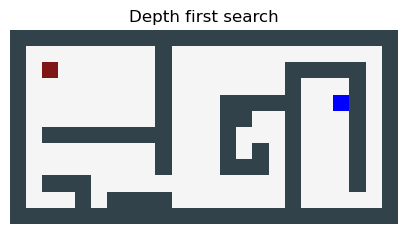

In [6]:
plot_maze(dfs_a3_maze, "Depth first search")

In [7]:
dfs_updated = update_maze_with_path(dfs_a3_maze, dfs_solution_path, dfs_traversed, dfs_a3_start_point,
                                    dfs_a3_goal_point)
print(dfs_updated)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1 4 4 4 4 0 6 4 4 4 4 4 4 4 1]
 [1 4 2 0 0 0 0 0 0 1 4 0 0 4 4 0 4 1 1 1 1 1 4 1]
 [1 4 0 0 0 0 0 0 0 1 4 4 4 0 4 4 4 1 0 0 0 1 4 1]
 [1 4 0 0 0 0 0 0 0 1 0 0 4 1 1 1 1 1 4 4 9 1 4 1]
 [1 4 0 0 0 0 0 0 0 1 4 4 4 1 1 6 6 1 4 0 0 1 4 1]
 [1 4 1 1 1 1 1 1 1 1 4 0 6 1 6 6 6 1 4 4 4 1 4 1]
 [1 4 0 0 0 0 0 0 0 1 4 4 0 1 6 1 6 1 0 0 4 1 4 1]
 [1 4 4 4 4 4 0 0 0 1 0 4 4 1 1 1 6 1 4 4 4 1 4 1]
 [1 6 1 1 1 4 4 4 4 4 4 0 4 6 6 6 6 1 4 0 0 1 4 1]
 [1 6 6 6 1 6 1 1 1 1 4 4 4 6 6 6 6 1 4 4 4 4 4 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


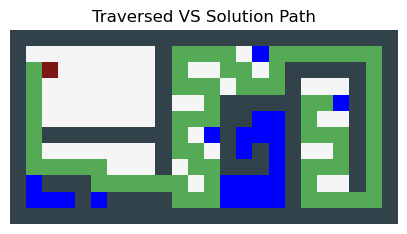

In [8]:
plot_maze(dfs_updated, "Traversed VS Solution Path")
#plot = plot_path(a3_maze, a3_maze_start, a3_maze_goal_point, bfs_solution_path, bfs_traversed)